In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import math
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('insclass_train.csv')

In [4]:
data

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,...,variable_20,variable_21,variable_22,variable_23,variable_24,variable_25,variable_26,variable_27,variable_28,target
0,w200,0,0,14,q2,98.0,NaN,0.0,NaN,0,...,C,j2,h45,0,0.0,0,1,19.323463,t1,0
1,w160,0,0,7,q11,106.0,NaN,0.0,NaN,0,...,C,j33,h234,0,1.0,0,1,41.177900,t1,0
2,w200,0,0,4,q3,123.0,NaN,0.0,NaN,0,...,B,j12,h28,0,0.0,0,1,3.614395,t1,0
3,w200,0,0,9,q3,102.0,NaN,0.0,NaN,0,...,C,j12,h64,0,1.0,0,0,49.041674,t1,0
4,w200,0,0,18,q20,117.0,NaN,0.0,NaN,0,...,C,j111,h991,0,1.0,0,0,17.909612,t1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151401,w48,0,0,3,q3,123.0,NaN,0.0,NaN,0,...,C,j0,h0,0,1.0,0,1,12.200897,t1,0
151402,w160,0,0,6,q3,123.0,1591.0,NaN,150000.0,0,...,C,j0,h0,0,1.0,0,1,31.787491,t1,0
151403,w200,0,0,7,q2,158.0,1998.0,0.0,NaN,0,...,C,j4,h14,0,0.0,0,1,7.883271,t1,0
151404,w48,0,0,3,q4,82.0,NaN,NaN,NaN,0,...,B,j7,h31,0,1.0,0,1,20.731525,t1,0


In [5]:
data.shape

(151406, 29)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151406 entries, 0 to 151405
Data columns (total 29 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   variable_1   151406 non-null  object 
 1   variable_2   151406 non-null  int64  
 2   variable_3   151406 non-null  int64  
 3   variable_4   151406 non-null  int64  
 4   variable_5   151406 non-null  object 
 5   variable_6   151295 non-null  float64
 6   variable_7   55767 non-null   float64
 7   variable_8   121507 non-null  float64
 8   variable_9   16970 non-null   float64
 9   variable_10  151406 non-null  int64  
 10  variable_11  151406 non-null  int64  
 11  variable_12  149878 non-null  float64
 12  variable_13  149749 non-null  float64
 13  variable_14  148479 non-null  float64
 14  variable_15  13 non-null      float64
 15  variable_16  151394 non-null  float64
 16  variable_17  151394 non-null  float64
 17  variable_18  151394 non-null  float64
 18  variable_19  151406 non-

In [7]:
for i in data.columns[2:]:
    print(i, data[i].isna().sum())

variable_3 0
variable_4 0
variable_5 0
variable_6 111
variable_7 95639
variable_8 29899
variable_9 134436
variable_10 0
variable_11 0
variable_12 1528
variable_13 1657
variable_14 2927
variable_15 151393
variable_16 12
variable_17 12
variable_18 12
variable_19 0
variable_20 1
variable_21 0
variable_22 0
variable_23 0
variable_24 2207
variable_25 0
variable_26 0
variable_27 2067
variable_28 0
target 0


In [8]:
for i in data.columns:
    if data[i].isna().sum()<3000:
        data =  data[data[i].notna()]
    if data[i].isna().sum()>100000:
        data = data.drop(i, axis = 1)

In [9]:
data

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,...,variable_20,variable_21,variable_22,variable_23,variable_24,variable_25,variable_26,variable_27,variable_28,target
0,w200,0,0,14,q2,98.0,NaN,0.0,0,0,...,C,j2,h45,0,0.0,0,1,19.323463,t1,0
1,w160,0,0,7,q11,106.0,NaN,0.0,0,0,...,C,j33,h234,0,1.0,0,1,41.177900,t1,0
2,w200,0,0,4,q3,123.0,NaN,0.0,0,0,...,B,j12,h28,0,0.0,0,1,3.614395,t1,0
3,w200,0,0,9,q3,102.0,NaN,0.0,0,0,...,C,j12,h64,0,1.0,0,0,49.041674,t1,0
4,w200,0,0,18,q20,117.0,NaN,0.0,0,0,...,C,j111,h991,0,1.0,0,0,17.909612,t1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151400,w200,0,0,12,q1,335.0,NaN,0.0,0,0,...,B,j31,h119,0,1.0,0,1,46.438089,t1,0
151401,w48,0,0,3,q3,123.0,NaN,0.0,0,0,...,C,j0,h0,0,1.0,0,1,12.200897,t1,0
151402,w160,0,0,6,q3,123.0,1591.0,NaN,0,0,...,C,j0,h0,0,1.0,0,1,31.787491,t1,0
151403,w200,0,0,7,q2,158.0,1998.0,0.0,0,0,...,C,j4,h14,0,0.0,0,1,7.883271,t1,0


In [10]:
for i in data.columns[2:]:
    print(i, data[i].isna().sum())

variable_3 0
variable_4 0
variable_5 0
variable_6 0
variable_7 93767
variable_8 27211
variable_10 0
variable_11 0
variable_12 0
variable_13 0
variable_14 0
variable_16 0
variable_17 0
variable_18 0
variable_19 0
variable_20 0
variable_21 0
variable_22 0
variable_23 0
variable_24 0
variable_25 0
variable_26 0
variable_27 0
variable_28 0
target 0


In [14]:
# for i, col in enumerate(data.columns[1:]):
#     plt.figure(i)
#     sns.boxplot(data[col].dtypes[data.dtypes!='str']).set_title(col)

KeyError: 'There are no fields in dtype int64.'

<Figure size 640x480 with 0 Axes>

In [15]:
data['variable_7'].fillna(data['variable_7'].median(), inplace=True)
data['variable_8'].fillna(data['variable_8'].median(), inplace=True)

In [16]:
for i in data.columns:
    print(i, data[i].isna().sum())

variable_1 0
variable_2 0
variable_3 0
variable_4 0
variable_5 0
variable_6 0
variable_7 0
variable_8 0
variable_10 0
variable_11 0
variable_12 0
variable_13 0
variable_14 0
variable_16 0
variable_17 0
variable_18 0
variable_19 0
variable_20 0
variable_21 0
variable_22 0
variable_23 0
variable_24 0
variable_25 0
variable_26 0
variable_27 0
variable_28 0
target 0


In [17]:
data1 = data.copy()
data1 = data1.dropna()
corr = data1.corr()
corr1 = corr.unstack()
corr2 = corr1.sort_values(kind = 'quicksort')
print(corr2[210:240])

variable_4   variable_8     0.002009
variable_8   variable_4     0.002009
variable_14  variable_11    0.002298
variable_11  variable_14    0.002298
             target         0.002461
target       variable_11    0.002461
variable_7   variable_11    0.002535
variable_11  variable_7     0.002535
variable_12  variable_17    0.002638
variable_17  variable_12    0.002638
variable_10  variable_2     0.002660
variable_2   variable_10    0.002660
variable_4   variable_17    0.002743
variable_17  variable_4     0.002743
variable_16  variable_17    0.002749
variable_17  variable_16    0.002749
variable_16  variable_11    0.002991
variable_11  variable_16    0.002991
variable_7   target         0.004450
target       variable_7     0.004450
variable_26  variable_8     0.004485
variable_8   variable_26    0.004485
variable_27  variable_26    0.004575
variable_26  variable_27    0.004575
variable_7   variable_2     0.005358
variable_2   variable_7     0.005358
variable_4   variable_7     0.005802
v

C:\Users\nabr9\AppData\Local\Temp\ipykernel_25084\3809231025.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data1.corr()


In [18]:
data2 = pd.read_csv('insclass_test.csv'); data2

,id,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,...,variable_19,variable_20,variable_21,variable_22,variable_23,variable_24,variable_25,variable_26,variable_27,variable_28
0,1,w200,0,0,12,q1,105.0,1598.0,0.0,NaN,...,154.244863,C,j1,h24,0,1.0,0,1,12.200897,t1
1,2,w160,0,0,19,q2,165.0,2500.0,NaN,NaN,...,148.905712,C,j40,h568,0,1.0,1,1,22.133735,t1
2,3,w160,0,0,6,q3,107.0,1396.0,NaN,NaN,...,122.974203,C,j12,h28,0,1.0,0,1,0.975189,t1
3,4,w200,0,0,11,q4,80.9,NaN,0.0,NaN,...,154.244863,C,j6,h62,1,1.0,0,1,0.975189,t1
4,5,w200,0,0,4,q3,197.0,NaN,0.0,NaN,...,148.905712,C,j12,h69,0,0.0,0,1,0.975189,t1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22619,22620,w200,0,0,7,q5,84.0,NaN,0.0,NaN,...,102.172584,C,j7,h82,0,0.0,0,1,NaN,t1
22620,22621,w145,0,0,9,q1,115.0,NaN,0.0,NaN,...,127.113159,C,j1,h24,0,1.0,0,1,2.249316,t1
22621,22622,w29,0,0,31,q0,72.0,NaN,0.0,NaN,...,102.172584,C,j6,h21,1,1.0,0,0,7.883271,t1
22622,22623,w160,0,0,12,q0,80.0,1690.0,0.0,NaN,...,148.905712,C,j3,h49,0,1.0,0,1,5.020658,t1


In [19]:
data2.shape

(22624, 29)

In [20]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22624 entries, 0 to 22623
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           22624 non-null  int64  
 1   variable_1   22624 non-null  object 
 2   variable_2   22624 non-null  int64  
 3   variable_3   22624 non-null  int64  
 4   variable_4   22624 non-null  int64  
 5   variable_5   22624 non-null  object 
 6   variable_6   22609 non-null  float64
 7   variable_7   8389 non-null   float64
 8   variable_8   18143 non-null  float64
 9   variable_9   2578 non-null   float64
 10  variable_10  22624 non-null  int64  
 11  variable_11  22624 non-null  int64  
 12  variable_12  22398 non-null  float64
 13  variable_13  22357 non-null  float64
 14  variable_14  22178 non-null  float64
 15  variable_15  1 non-null      float64
 16  variable_16  22622 non-null  float64
 17  variable_17  22622 non-null  float64
 18  variable_18  22622 non-null  float64
 19  vari

In [21]:
for i in data2.columns:
    print(i, data2[i].isna().sum())

id 0
variable_1 0
variable_2 0
variable_3 0
variable_4 0
variable_5 0
variable_6 15
variable_7 14235
variable_8 4481
variable_9 20046
variable_10 0
variable_11 0
variable_12 226
variable_13 267
variable_14 446
variable_15 22623
variable_16 2
variable_17 2
variable_18 2
variable_19 0
variable_20 0
variable_21 0
variable_22 0
variable_23 0
variable_24 329
variable_25 0
variable_26 0
variable_27 344
variable_28 0


In [22]:
for i in data2.columns:
    if data2[i].isna().sum()>20000:
        data2 = data2.drop(i, axis = 1)

In [25]:
for i in data2.loc[:, data2.isnull().any()].copy():
    data2[i].fillna(data2[i].median(), inplace=True)

id 0
variable_1 0
variable_2 0
variable_3 0
variable_4 0
variable_5 0
variable_6 0
variable_7 0
variable_8 0
variable_10 0
variable_11 0
variable_12 0
variable_13 0
variable_14 0
variable_16 0
variable_17 0
variable_18 0
variable_19 0
variable_20 0
variable_21 0
variable_22 0
variable_23 0
variable_24 0
variable_25 0
variable_26 0
variable_27 0
variable_28 0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146011 entries, 0 to 151405
Data columns (total 27 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   variable_1   146011 non-null  object 
 1   variable_2   146011 non-null  int64  
 2   variable_3   146011 non-null  int64  
 3   variable_4   146011 non-null  int64  
 4   variable_5   146011 non-null  object 
 5   variable_6   146011 non-null  float64
 6   variable_7   146011 non-null  float64
 7   variable_8   146011 non-null  float64
 8   variable_10  146011 non-null  int64  
 9   variable_11  146011 non-null  int64  
 10  variable_12  146011 non-null  float64
 11  variable_13  146011 non-null  float64
 12  variable_14  146011 non-null  float64
 13  variable_16  146011 non-null  float64
 14  variable_17  146011 non-null  float64
 15  variable_18  146011 non-null  float64
 16  variable_19  146011 non-null  float64
 17  variable_20  146011 non-null  object 
 18  variable_21  146011 non-

In [34]:
for i in data.select_dtypes(include=['object']).columns:
    data[i] = pd.factorize(data[i])[0]

In [36]:
for i in data2.select_dtypes(include=['object']).columns:
    data2[i] = pd.factorize(data2[i])[0]

C:\Users\nabr9\AppData\Local\Temp\ipykernel_25084\931275993.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i)


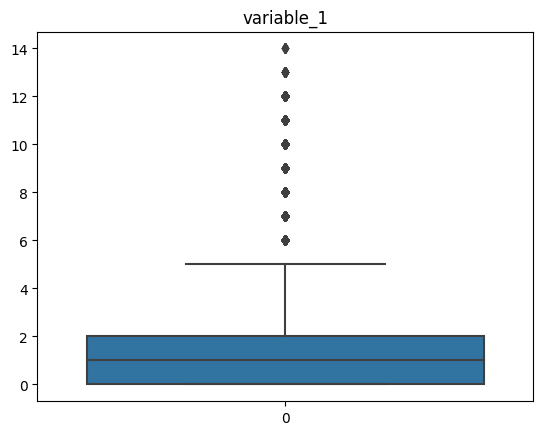

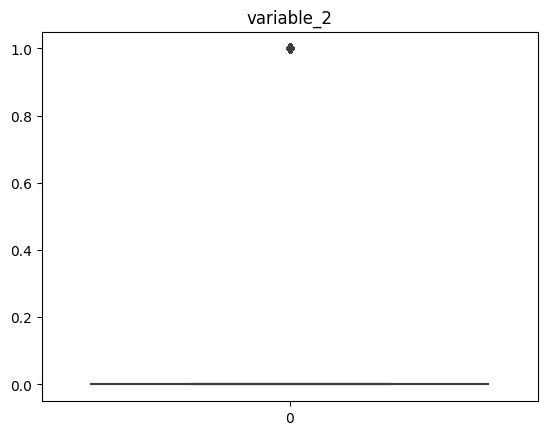

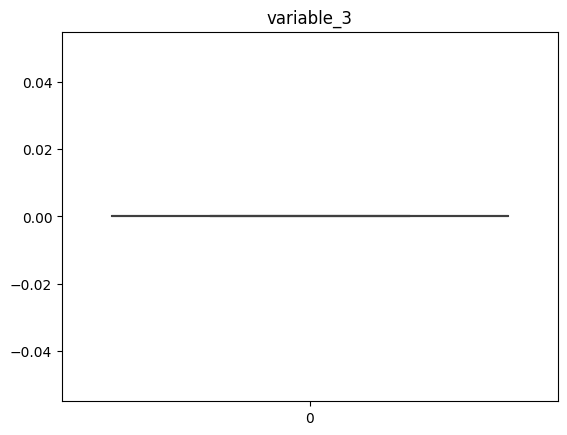

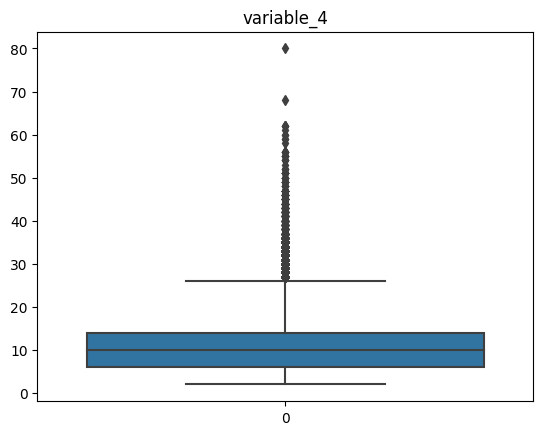

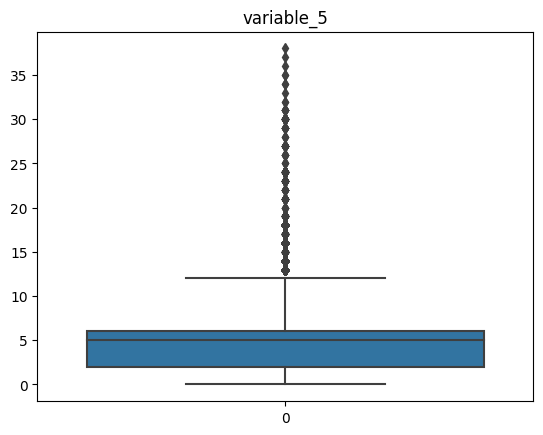

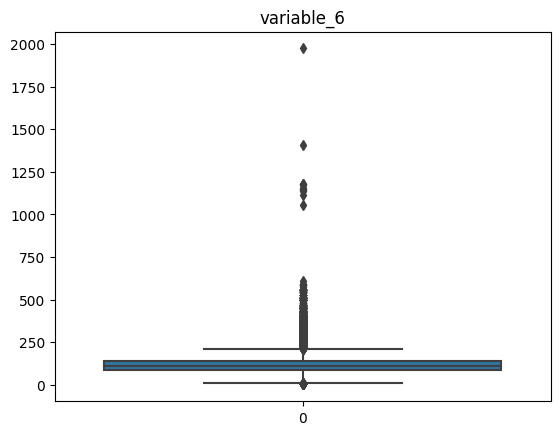

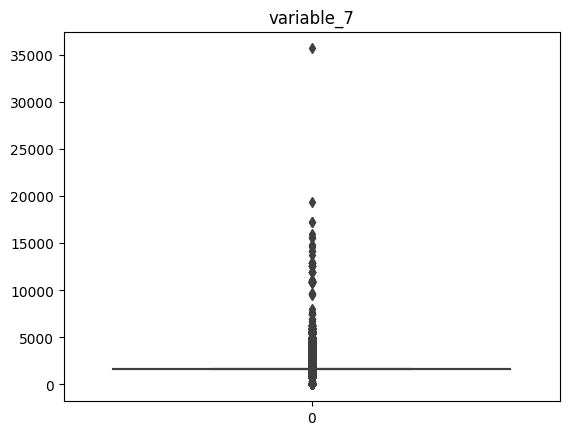

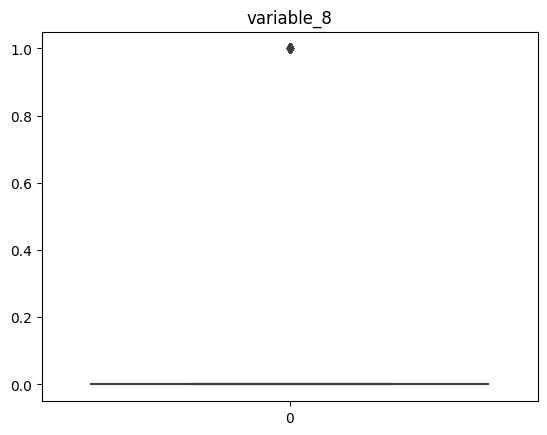

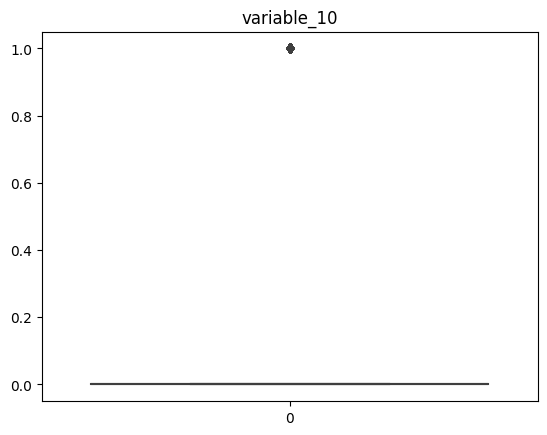

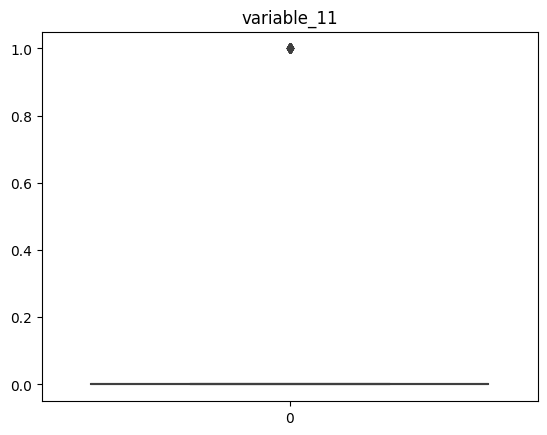

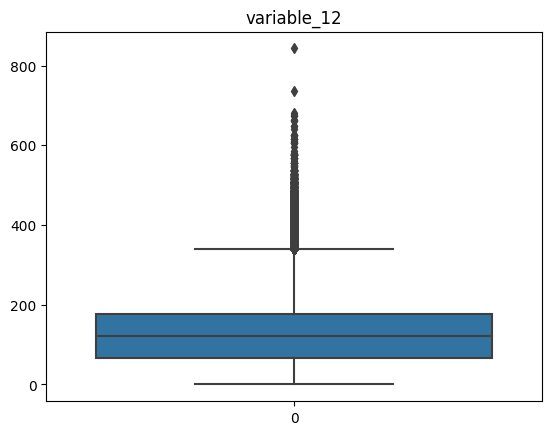

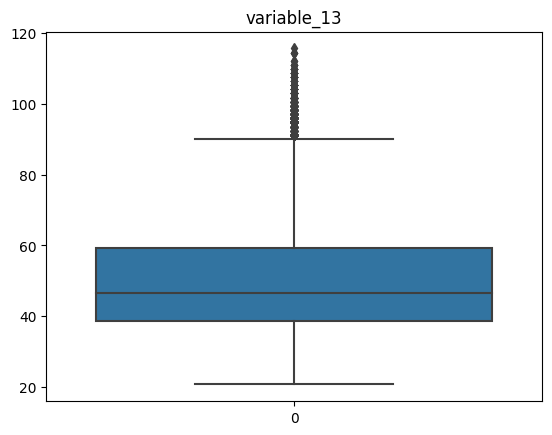

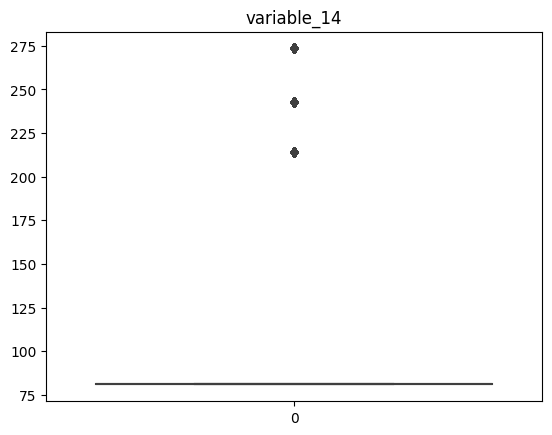

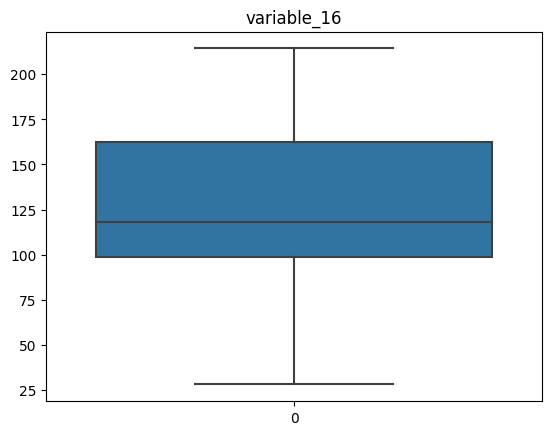

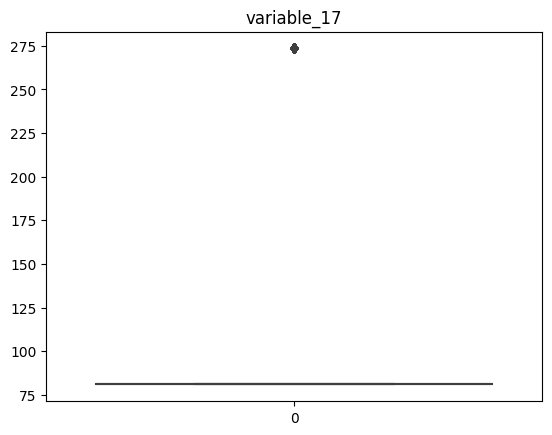

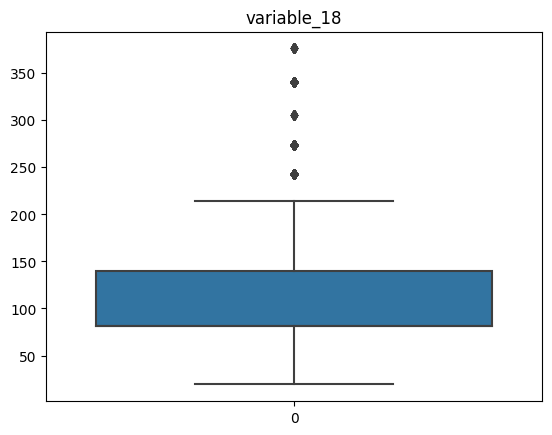

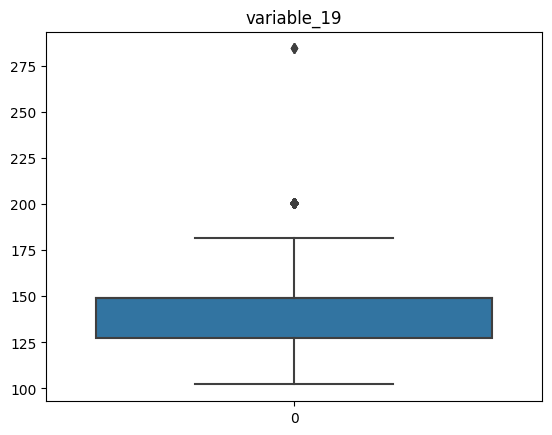

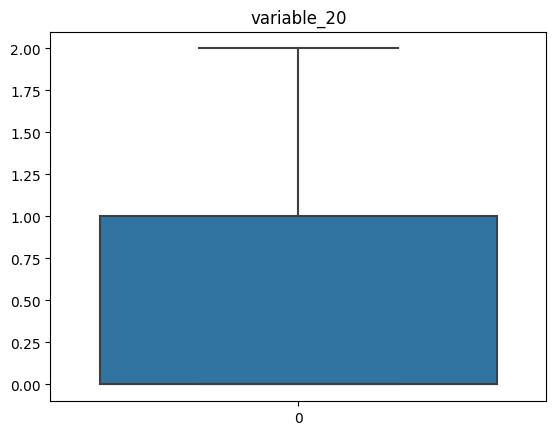

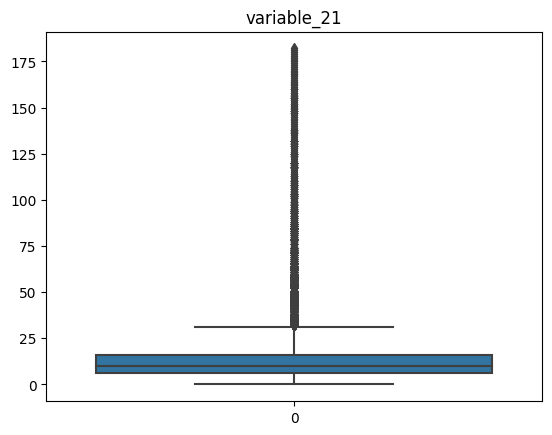

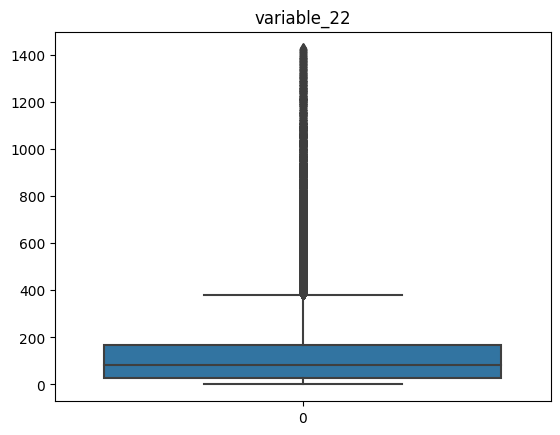

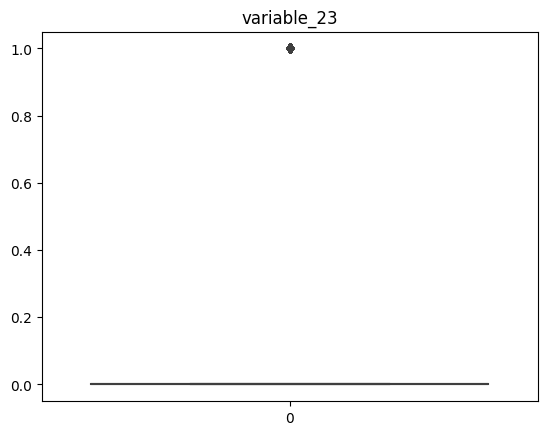

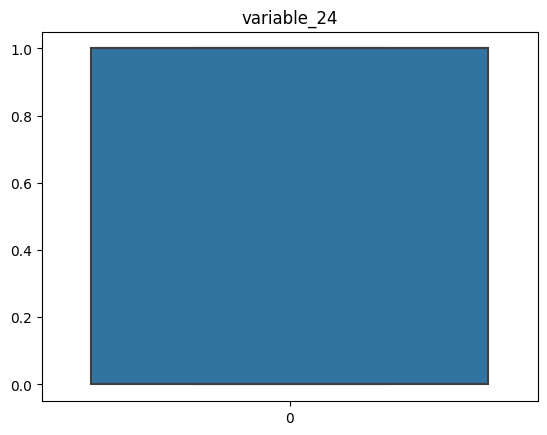

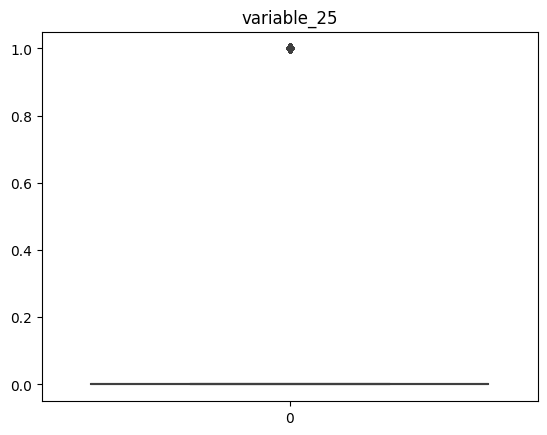

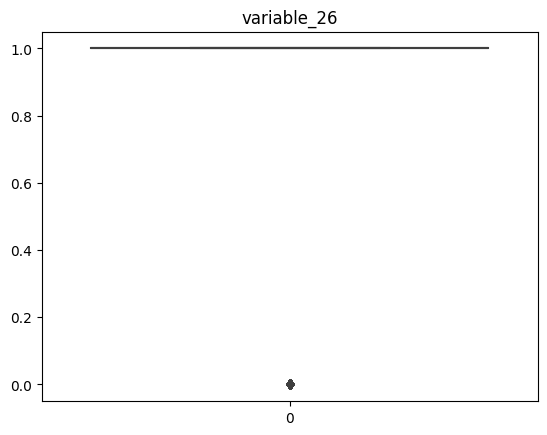

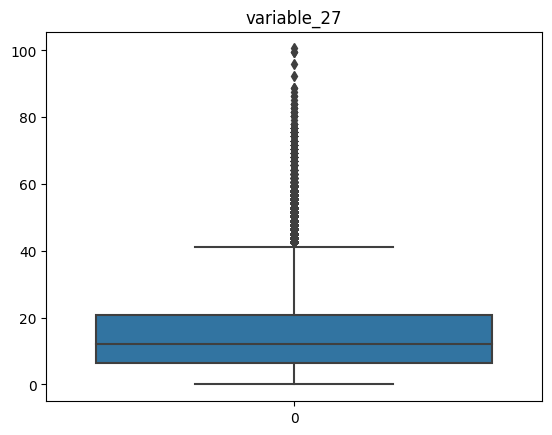

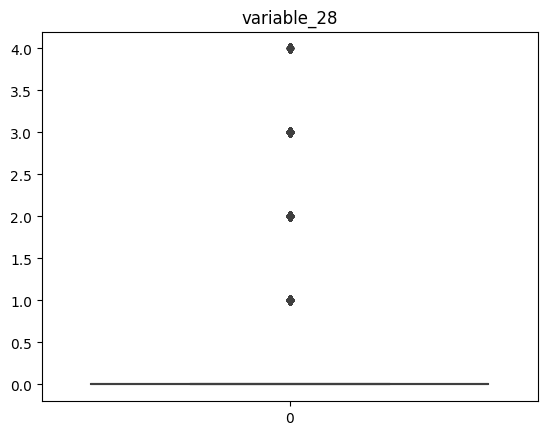

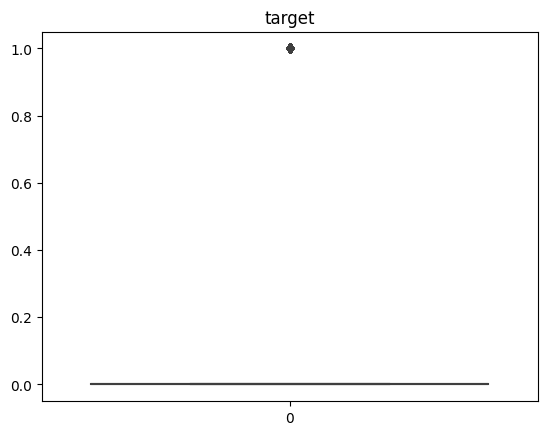

In [39]:
for i, col in enumerate(data.columns):
    plt.figure(i)
    sns.boxplot(data[col]).set_title(col)

In [40]:
data_check = pd.read_csv('insclass_train.csv')

In [43]:
data_check['variable_6'].max()

115.578552012725

In [42]:
for i in data_check.select_dtypes(include=['object']).columns:
    print(i)

variable_1
variable_5
variable_20
variable_21
variable_22
variable_28


In [44]:
data_check[data_check['variable_6'] == data_check['variable_6'].max()]

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,...,variable_20,variable_21,variable_22,variable_23,variable_24,variable_25,variable_26,variable_27,variable_28,target
67767,w160,0,0,6,q3,1975.0,2359.0,NaN,78084.0,0,...,A,j12,h69,0,0.0,0,1,3.614395,t1,1


In [45]:
data = data.drop('variable_22', axis=1)

In [47]:
data2 = data2.drop('variable_22', axis=1)

In [49]:
data = data[data['variable_6']<=750]

In [56]:
data = data[data['variable_13']<=80]

In [109]:
Y = data['target']

In [110]:
X = data.loc[:, data.columns != 'target']

In [111]:
X

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_10,variable_11,...,variable_18,variable_19,variable_20,variable_21,variable_23,variable_24,variable_25,variable_26,variable_27,variable_28
0,0,0,0,14,0,98.0,1598.0,0.0,0,0,...,80.985224,127.113159,0,0,0,0.0,0,1,19.323463,0
2,0,0,0,4,2,123.0,1598.0,0.0,0,0,...,273.413449,154.244863,1,2,0,0.0,0,1,3.614395,0
3,0,0,0,9,2,102.0,1598.0,0.0,0,0,...,80.985224,131.067787,0,2,0,1.0,0,0,49.041674,0
4,0,0,0,18,3,117.0,1598.0,0.0,0,0,...,118.116608,131.067787,0,3,0,1.0,0,0,17.909612,0
5,1,0,0,27,4,70.0,1598.0,0.0,0,0,...,38.704257,148.905712,0,4,0,0.0,0,1,19.323463,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151400,0,0,0,12,5,335.0,1598.0,0.0,0,0,...,80.985224,154.244863,1,5,0,1.0,0,1,46.438089,0
151401,3,0,0,3,2,123.0,1598.0,0.0,0,0,...,98.648082,181.463784,0,13,0,1.0,0,1,12.200897,0
151402,1,0,0,6,2,123.0,1591.0,0.0,0,0,...,38.704257,131.419341,0,13,0,1.0,0,1,31.787491,0
151403,0,0,0,7,0,158.0,1998.0,0.0,0,0,...,139.401847,181.463784,0,8,0,0.0,0,1,7.883271,0


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42, stratify = Y)

In [65]:
rfc = RandomForestClassifier(random_state=0)

In [66]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [67]:
y_pred = rfc.predict(X_test)

In [68]:
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9285


In [69]:
rfc_100 = RandomForestClassifier(n_estimators=1000, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(roc_auc_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9285


In [76]:
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(roc_auc_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.5784


In [70]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=1000, random_state=0)

# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [71]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

variable_12    0.130515
variable_6     0.105674
variable_13    0.096524
variable_19    0.090888
variable_27    0.087982
variable_18    0.085563
variable_4     0.077180
variable_21    0.067334
variable_7     0.054125
variable_1     0.049522
variable_5     0.048321
variable_16    0.027507
variable_24    0.019429
variable_20    0.017462
variable_26    0.012614
variable_25    0.007053
variable_23    0.005806
variable_14    0.005168
variable_17    0.003199
variable_10    0.003162
variable_2     0.003085
variable_28    0.001425
variable_11    0.000254
variable_8     0.000207
variable_3     0.000000
dtype: float64

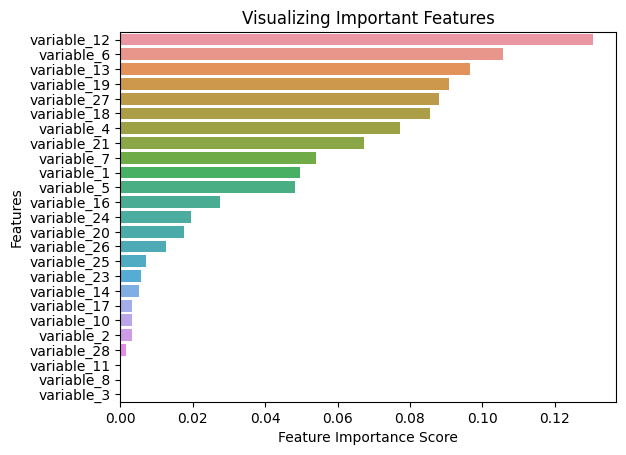

In [72]:
sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

In [98]:
X = data[data.columns[~data.columns.isin(['target', 'variable_3', 'variable_8', 'variable_11'])]]

Y = data['target']

In [99]:
X

,variable_1,variable_2,variable_4,variable_5,variable_6,variable_7,variable_10,variable_12,variable_13,variable_14,...,variable_18,variable_19,variable_20,variable_21,variable_23,variable_24,variable_25,variable_26,variable_27,variable_28
0,0,0,14,0,98.0,1598.0,0,166.266987,49.041674,80.985224,...,80.985224,127.113159,0,0,0,0.0,0,1,19.323463,0
2,0,0,4,2,123.0,1598.0,0,38.519899,35.842308,80.985224,...,273.413449,154.244863,1,2,0,0.0,0,1,3.614395,0
3,0,0,9,2,102.0,1598.0,0,109.845800,70.549602,80.985224,...,80.985224,131.067787,0,2,0,1.0,0,0,49.041674,0
4,0,0,18,3,117.0,1598.0,0,224.168209,42.499789,80.985224,...,118.116608,131.067787,0,3,0,1.0,0,0,17.909612,0
5,1,0,27,4,70.0,1598.0,0,326.100687,46.438089,80.985224,...,38.704257,148.905712,0,4,0,0.0,0,1,19.323463,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151400,0,0,12,5,335.0,1598.0,0,145.738194,71.783787,80.985224,...,80.985224,154.244863,1,5,0,1.0,0,1,46.438089,0
151401,3,0,3,2,123.0,1598.0,0,13.635261,51.628454,80.985224,...,98.648082,181.463784,0,13,0,1.0,0,1,12.200897,0
151402,1,0,6,2,123.0,1591.0,0,68.071719,61.819167,80.985224,...,38.704257,131.419341,0,13,0,1.0,0,1,31.787491,0
151403,0,0,7,0,158.0,1998.0,0,76.689904,47.742021,80.985224,...,139.401847,181.463784,0,8,0,0.0,0,1,7.883271,0


In [100]:
# for i in data2.columns:
#     if i in X.columns:
#         print(i, 'в X')
#     else:
#         print(i, 'не в X')

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42, stratify = Y)

In [102]:
rfc_100 = RandomForestClassifier(n_estimators=1000, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(roc_auc_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.5778


In [103]:
X_test_2 = data2[data2.columns[~data2.columns.isin(['id', 'variable_3', 'variable_8', 'variable_11'])]]

In [104]:
X_test_2

,variable_1,variable_2,variable_4,variable_5,variable_6,variable_7,variable_10,variable_12,variable_13,variable_14,...,variable_18,variable_19,variable_20,variable_21,variable_23,variable_24,variable_25,variable_26,variable_27,variable_28
0,0,0,12,0,105.0,1598.0,0,151.191333,39.851301,80.985224,...,80.985224,154.244863,0,0,0,1.0,0,1,12.200897,0
1,1,0,19,1,165.0,2500.0,0,69.312262,45.129796,80.985224,...,38.704257,148.905712,0,1,0,1.0,1,1,22.133735,0
2,1,0,6,2,107.0,1396.0,0,60.558310,39.851301,242.904217,...,162.514016,122.974203,0,2,0,1.0,0,1,0.975189,0
3,0,0,11,3,80.9,1598.0,0,134.714306,26.305265,273.413449,...,80.985224,154.244863,0,3,1,1.0,0,1,0.975189,0
4,0,0,4,2,197.0,1598.0,0,35.842308,45.129796,80.985224,...,38.704257,148.905712,0,2,0,0.0,0,1,0.975189,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22619,0,0,7,6,84.0,1598.0,0,75.467879,33.144352,242.904217,...,139.401847,102.172584,0,6,0,0.0,0,1,12.200897,0
22620,3,0,9,0,115.0,1598.0,0,108.693096,69.312262,80.985224,...,80.985224,127.113159,0,0,0,1.0,0,1,2.249316,0
22621,9,0,31,5,72.0,1598.0,0,365.344676,50.337125,80.985224,...,139.401847,102.172584,0,3,1,1.0,0,0,7.883271,0
22622,1,0,12,5,80.0,1690.0,0,145.738194,38.519899,80.985224,...,38.704257,148.905712,0,20,0,1.0,0,1,5.020658,0


In [105]:
y_pred_1000 = rfc_100.predict(X_test_2)

In [106]:
y_pred_1000

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [87]:
result=pd.DataFrame(data={'id':data2['id'],'target':y_pred_1000})

In [88]:
result

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
22619,22620,0
22620,22621,0
22621,22622,0
22622,22623,0


In [89]:
result.to_csv('insurance_result.csv', index=False,encoding='utf-8')

In [189]:
X = data[data.columns[~data.columns.isin(['target', 'variable_3', 'variable_8', 'variable_11'])]]

Y = data['target'].to_numpy().ravel()

In [190]:
scaler = MinMaxScaler()
cols = X.columns
X = scaler.fit_transform(X)

In [191]:
X

array([[0.        , 0.        , 0.15384615, ..., 1.        , 0.24802607,
        0.        ],
       [0.        , 0.        , 0.02564103, ..., 1.        , 0.04639253,
        0.        ],
       [0.        , 0.        , 0.08974359, ..., 0.        , 0.62947381,
        0.        ],
       ...,
       [0.07142857, 0.        , 0.05128205, ..., 1.        , 0.40800796,
        0.        ],
       [0.        , 0.        , 0.06410256, ..., 1.        , 0.10118563,
        0.        ],
       [0.07142857, 0.        , 0.02564103, ..., 1.        , 0.24802607,
        0.        ]])

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42, stratify = Y)

In [193]:
X_test_2 = data2[data2.columns[~data2.columns.isin(['id', 'variable_3', 'variable_8', 'variable_11'])]]
X_test_2 = scaler.transform(X_test_2)

In [194]:
loss = ["exponential", "log_loss"]

max_depth = [2, 3, 5, 10, 15]

min_samples_leaf = [1, 2, 4, 6, 8]

min_samples_split = [2, 4, 6, 10]

max_features = ["sqrt", "log2", None]

hyperparameter_grid = {"loss": loss,
                       "max_depth": max_depth,
                       "min_samples_leaf": min_samples_leaf,
                       "min_samples_split": min_samples_split,
                       "max_features": max_features}

In [195]:
basic_model = GradientBoostingClassifier(random_state=42)

random_cv = RandomizedSearchCV(estimator=basic_model,
                               param_distributions=hyperparameter_grid,
                               cv=5, n_iter=35, 
                               scoring="roc_auc",
                               n_jobs=-1, verbose=1, 
                               return_train_score=True,
                               random_state=42)

In [196]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=35, n_jobs=-1,
                   param_distributions={'loss': ['exponential', 'log_loss'],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 10]},
                   random_state=42, return_train_score=True, scoring='roc_auc',
                   verbose=1)

In [197]:
# random_results = pd.DataFrame(random_cv.cv_results_).sort_values("mean_test_score", ascending=False)

In [198]:
random_cv.best_estimator_

GradientBoostingClassifier(loss='exponential', max_depth=5,
                           min_samples_split=10, random_state=42)

In [199]:
trees_grid = {"n_estimators": [50, 100, 150, 200, 250, 300, 1000, 1500, 2000, 2500]}

basic_model = random_cv.best_estimator_
grid_search = GridSearchCV(estimator=basic_model, param_grid=trees_grid, cv=5, 
                           scoring="roc_auc", verbose=1,
                           n_jobs=-1, return_train_score=True)

In [200]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(loss='exponential',
                                                  max_depth=5,
                                                  min_samples_split=10,
                                                  random_state=42),
             n_jobs=-1,
             param_grid={'n_estimators': [50, 100, 150, 200, 250, 300, 1000,
                                          1500, 2000, 2500]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [201]:
basic_final_model = grid_search.best_estimator_
basic_final_model

GradientBoostingClassifier(loss='exponential', max_depth=5,
                           min_samples_split=10, n_estimators=50,
                           random_state=42)

In [178]:
# view the feature scores

feature_scores = pd.Series(basic_final_model.feature_importances_).sort_values(ascending=False)

feature_scores

13    0.646108
12    0.210221
8     0.031972
6     0.018099
4     0.014056
20    0.013450
7     0.011669
14    0.007732
0     0.007584
15    0.007413
5     0.006878
11    0.005703
3     0.003824
19    0.003564
2     0.003087
17    0.002634
16    0.002141
1     0.002116
21    0.000734
10    0.000436
9     0.000364
18    0.000217
dtype: float64

In [174]:
# X_test_2 = data2[data2.columns[~data2.columns.isin(['id'])]]

In [202]:
basic_final_pred = basic_final_model.predict(X_test)

In [203]:
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(roc_auc_score(y_test, basic_final_pred)))

Model accuracy score with 100 decision-trees : 0.5788


In [185]:
y_pred = basic_final_model.predict(X_test_2)

C:\Users\nabr9\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [186]:
result=pd.DataFrame(data={'id':data2['id'],'target':y_pred})

In [187]:
result

,id,target
0,1,0
1,2,1
2,3,1
3,4,0
4,5,1
...,...,...
22619,22620,1
22620,22621,0
22621,22622,1
22622,22623,1


In [188]:
result.to_csv('insurance_result_1.csv', index=False,encoding='utf-8')